http://actionrecognition.net/files/dsetdetail.php?did=15;
https://github.com/epic-kitchens/annotations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, EPIC_KITCHENS_DIR
import urllib.request

In [3]:
import pandas as pd

In [4]:
actions_data = pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

In [95]:
PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/EPIC_KITCHENS_Data_Dir/EP')


PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/EPIC_KITCHENS_Data_Dir')

In [ ]:
pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

In [5]:
actions_data[:3]

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]


In [93]:
len(np.unique(actions_data.verb_class.values))

119

In [6]:
actions_data.participant_id.unique()

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P10',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31'], dtype=object)

In [7]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [8]:
actions = [actions_data[actions_data.video_id == vid].verb_class.values for vid in tqdm(actions_data.video_id.unique())]

In [83]:
actions_name = [[actions_data[actions_data.video_id == vid].verb.values, actions_data[actions_data.video_id == vid].noun.values] for vid in tqdm(actions_data.video_id.unique())]

In [88]:
[(verb +' '+ noun) for verb, noun in zip(actions_name[0][0], actions_name[0][1])]

['open door',
 'turn-on light',
 'close door',
 'open fridge',
 'take celery',
 'take container',
 'take tofu',
 'close fridge',
 'open fridge',
 'take carrot',
 'open drawer',
 'close fridge',
 'put-down vegetable',
 'open cupboard',
 'take board:cutting',
 'put-down board:cutting',
 'close cupboard',
 'open drawer',
 'take knife',
 'take knife',
 'put-down knife',
 'close drawer',
 'put-down knife',
 'open tap',
 'wash courgette',
 'wash courgette',
 'wash carrot',
 'wash carrot',
 'close tap',
 'put-down vegetable',
 'open cupboard',
 'take grater',
 'take pan',
 'put-down pan',
 'close cupboard',
 'close cupboard',
 'take courgette',
 'cut courgette',
 'turn-on hob',
 'cut courgette',
 'cut courgette',
 'dice courgette',
 'dice courgette',
 'dice courgette',
 'dice courgette',
 'pour courgette',
 'throw courgette',
 'open drawer',
 'close drawer',
 'take spatula',
 'stir courgette',
 'take salt',
 'open salt',
 'pour salt',
 'put-down salt',
 'stir courgette',
 'put-down spatula',


In [81]:
len(actions_name[0])

326

In [82]:
len(actions[0])

326

In [79]:
actions[0]

array([ 2, 12,  3,  2,  0,  0,  0,  3,  2,  0,  2,  3,  1,  2,  0,  1,  3,
        2,  0,  0,  1,  3,  1,  2,  4,  4,  4,  4,  3,  1,  2,  0,  0,  1,
        3,  3,  0,  5, 12,  5,  5,  5,  5,  5,  5,  7,  8,  2,  3,  0,  6,
        0,  2,  7,  1,  6,  1,  0,  4,  2,  4,  3,  1,  5,  5,  7,  1,  0,
        8,  2,  1,  3,  0,  6,  1,  2,  0,  0,  1,  3,  0,  0,  5,  5,  5,
        1,  0,  2,  7,  7,  3, 13,  0,  6,  6,  0,  0,  2,  1,  3,  0,  2,
        1,  0,  1,  2,  1,  3,  1,  0,  1,  2,  0,  1,  2,  0,  1,  0,  6,
        0,  2,  1,  3,  0,  6,  0,  0,  0,  5, 61, 37, 37, 37, 37,  1,  8,
        0,  1,  8,  0,  6,  2,  0,  1, 13,  0,  7, 50,  1,  0,  7,  3,  1,
        0,  0,  7,  1,  6,  6,  0,  2,  1,  2,  0,  7,  7,  6,  3,  1,  1,
        0,  6, 17,  6,  6,  6,  1,  2,  0,  1,  0,  2,  1,  0,  6,  6,  1,
        0,  0,  5,  2,  7,  1,  6,  1,  0,  8,  8,  8,  0,  6,  0,  7,  7,
       46,  3,  2,  1,  6,  0,  0,  2,  7,  3,  1,  0,  2,  1,  3,  0,  6,
       17,  6,  6,  1,  0

In [9]:
behav_lens = [len(i) for i in actions]

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
np.sum(behav_lens)

28472

In [13]:
len(np.unique(np.concatenate(actions)))

119

In [14]:
np.median(behav_lens)

45.0

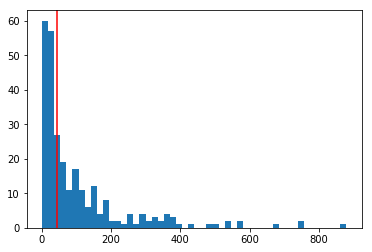

In [15]:
fig, ax = plt.subplots()
ax.hist(behav_lens, bins = 50);
ax.axvline(np.median(behav_lens), color='red')

### MI

In [16]:
from childes_mi.information_theory import mutual_information as mi

In [62]:
distances = np.arange(1,np.median(behav_lens)+1).astype('int')

In [63]:
actions_indv = [["{}_{}".format(bi, element) for element in bout] for bi, bout in enumerate(tqdm(actions))]

In [64]:
actions_indv[0][:10]

['0_2', '0_12', '0_3', '0_2', '0_0', '0_0', '0_0', '0_3', '0_2', '0_0']

In [65]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    np.array(actions_indv), distances=distances, n_jobs=-1, estimate=True
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 out of  45 | elapsed:    1.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  18 out of  45 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  28 out of  45 | elapsed:    2.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.


[Parallel(n_jobs=-1)]: Done  18 out of  45 | elapsed:    2.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  28 out of  45 | elapsed:    2.8s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.9s finished


In [66]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [67]:
MI_DF.to_pickle(DATA_DIR / "mi" / "epic_kitchens.pickle")

In [68]:
row = MI_DF.iloc[0]

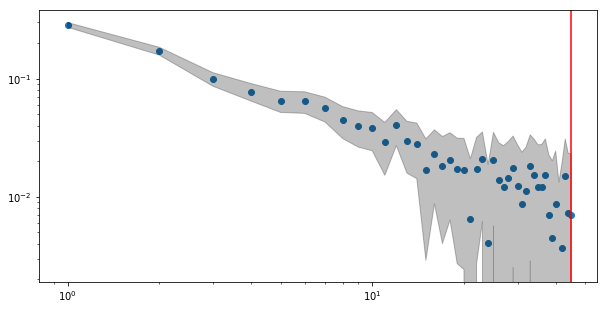

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var
ax.axvline(np.median(behav_lens), color='red')
ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
#ax.set_ylim([1e-3, 1])
ax.set_yscale('log')
ax.set_xscale('log')

### longest sequence

In [72]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [actions[np.argmax(behav_lens)]], distances=distances, n_jobs=-1, estimate=True
)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  45 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  18 out of  45 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  45 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  45 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  18 out of  45 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  28 out of  45 | elapsed:    0.2s remaining:    0.1s


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.2s finished


In [73]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [74]:
row = MI_DF.iloc[0]

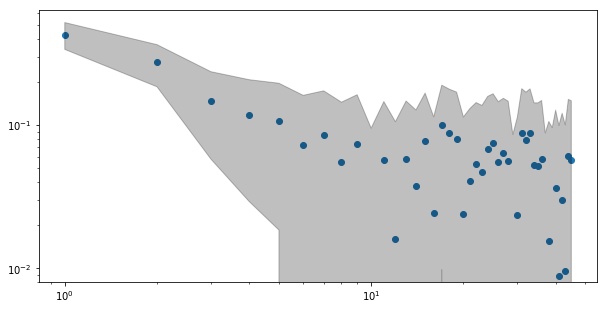

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
#ax.set_ylim([1e-3, 1])
ax.set_yscale('log')
ax.set_xscale('log')